In [2]:
import pandas as pd

/Users/xrz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df_all = pd.read_csv("emoji_text_0.csv")

In [4]:
df_all

,Unnamed: 0,time,text
0,0,2024-01-21 09:52:25+00:00,🚨Get ready for a game-changer!\n\n🗓️On January...
1,1,2024-01-21 08:38:10+00:00,@pi2team @CoinMarketCap @ice_z3us @ice_th0r We...
2,2,2024-01-21 07:00:01+00:00,"🚨 US$10,000 $SEI App Campaign ends today 🚨\n\n..."
3,3,2024-01-21 06:10:49+00:00,#Crypto Weekly Stats 📊\n\nWatchlist:\n$BTC ↓\...
4,4,2024-01-20 22:00:01+00:00,Fit check\n📸: @CsillaCRO https://t.co/1BQjfOUVK5
...,...,...,...
13009,13009,2024-01-23 20:17:08+00:00,@bubblemaps Really nice to see a balanced thre...
13010,13010,2024-01-23 20:14:53+00:00,#Bitcoin has arrived at the range low. \n\nHit...
13011,13011,2024-01-23 19:45:42+00:00,@Very_Finance They literally won't because it'...
13012,13012,2024-01-23 18:00:22+00:00,@CryptoDegenDude @satoshivm If you don't take ...


In [5]:
example_list = list(df_all['text'])

In [6]:
def is_emoji(s):
    # Check if a character is an emoji based on Unicode ranges
    return ('\U0001F300' <= s <= '\U0001F5FF' or
            '\U0001F600' <= s <= '\U0001F64F' or
            '\U0001F680' <= s <= '\U0001F6FF' or
            '\U0001F700' <= s <= '\U0001F77F' or
            '\U0001F780' <= s <= '\U0001F7FF' or
            '\U0001F800' <= s <= '\U0001F8FF' or
            '\U0001F900' <= s <= '\U0001F9FF' or
            '\U0001FA00' <= s <= '\U0001FA6F' or
            '\U0001FA70' <= s <= '\U0001FAFF')

def extract_and_count_emojis(string_list):
    emoji_count = {}
    for text in string_list:
        try:
            for char in text:
                if is_emoji(char):
                    emoji_count[char] = emoji_count.get(char, 0) + 1
        except:
            continue
    return emoji_count

# Example usage
#example_list = ["Hello 👋", "I love Python 🐍", "Happy coding! 😊👩‍💻"]
emoji_counts = extract_and_count_emojis(example_list)
print(emoji_counts)


{'🚨': 323, '🗓': 41, '🌟': 63, '👉': 286, '📊': 124, '📸': 21, '📈': 258, '💤': 3, '🏻': 127, '🟦': 19, '🟫': 11, '😂': 237, '🔀': 1, '🏆': 613, '📉': 100, '🖼': 6, '💪': 61, '🔥': 1540, '🔔': 109, '🚀': 1277, '👇': 691, '💳': 5, '🔋': 1, '💷': 9, '🏦': 9, '🤝': 332, '🎉': 174, '🤖': 27, '😎': 49, '📱': 7, '💵': 25, '\U0001f90c': 7, '🖋': 1, '🔒': 16, '📆': 12, '🕓': 5, '💰': 171, '📌': 276, '🔄': 12, '🎮': 11, '🤔': 81, '💡': 24, '💱': 6, '🧑': 15, '😌': 5, '😱': 15, '💸': 56, '🌱': 46, '💌': 82, '💀': 4, '🤦': 5, '🧐': 28, '🥶': 1, '🦍': 29, '📢': 36, '🎁': 244, '\U0001f979': 9, '🖤': 7, '👀': 504, '🏒': 4, '📍': 13, '📺': 8, '🎧': 6, '👑': 47, '🦾': 22, '🥇': 11, '🥈': 1, '🥉': 1, '🏅': 17, '🌾': 15, '💥': 190, '🤯': 53, '🏪': 1, '🔟': 3, '🕗': 2, '💻': 15, '📻': 2, '🗳': 1, '🌌': 10, '🎟': 7, '👊': 23, '🔗': 22, '🥁': 2, '🎯': 59, '🤣': 126, '🤙': 10, '😏': 9, '🤞': 15, '😔': 2, '😭': 35, '🦄': 14, '🤑': 58, '🥳': 246, '🧵': 39, '\U0001faa1': 1, '🍄': 4, '🎊': 27, '🌐': 44, '\U0001fae1': 72, '🧹': 1, '🦨': 1, '🍀': 57, '🐼': 197, '💞': 10, '💚': 26, '👋': 87, '💎': 246, '🙏': 161, '

In [7]:
sorted_emoji_counts = dict(sorted(emoji_counts.items(), key=lambda item: item[1], reverse=True))

In [8]:
import matplotlib.pyplot as plt

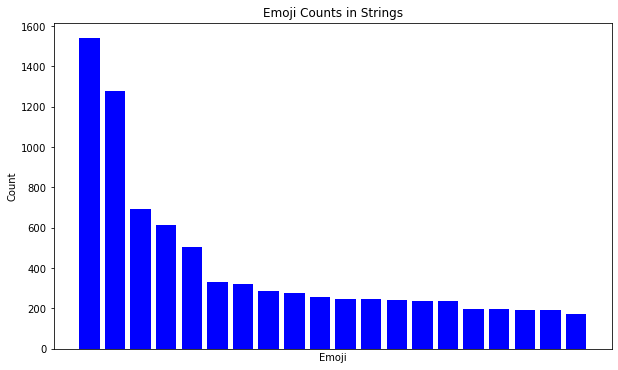

In [9]:
df = pd.DataFrame(list(sorted_emoji_counts.items()), columns=['Emoji', 'Count'])
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Emoji'].iloc[:20], df['Count'].iloc[:20], color='blue')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.title('Emoji Counts in Strings')
plt.xticks([],[])
plt.savefig("BTCEmojiCount.png", transparent = True)
plt.show()